In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
main_table = pd.read_csv("MainTable.csv")
subjects_table = pd.read_csv("Subject.csv")

In [8]:
main_table.head(5)

,Order,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,CourseSectionID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,ParentEventID,SourceLocation
0,119630,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Run.Program,1.00,NaN,NaN,NaN,1-69176,NaN,NaN
1,119631,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:03,UTC,CS 1,1,439.0,1,efdf3fae54cdc0a09fb81fcfa365c5f843e837b0,True,Compile,NaN,Success,NaN,NaN,1-69177,1-69176,NaN
2,134330,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Run.Program,1.00,NaN,NaN,NaN,3-68089,NaN,NaN
3,134331,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:13:33,0,CS 1,1,439.0,3,79b2bcc8f502e1f7d2d4e83d1894964684c89b85,True,Compile,NaN,Success,NaN,NaN,3-68090,3-68089,NaN
4,65666,00c54f9462673d4c09d2a88121860841,Java 8; CodeWorkout,2019-02-24T05:09:54,UTC,CS 1,1,439.0,5,2697d299e7c5992f557ce38d8a04345112a11af8,True,Run.Program,0.75,NaN,NaN,NaN,5-35681,NaN,NaN


In [9]:
subjects_table.head(5)

,SubjectID,X-Grade
0,65be44ae7088566069cc3bef454174a7,0.3600
1,0bdf2c1f053650715e1f0c725d754b96,0.3917
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160
3,f4db8537e9d75da46c4efc36a2d70956,0.4310
4,d7419ae04f248e5105ac3d0700389775,0.7244


In [24]:

problem_counts = main_table.groupby(['SubjectID', 'ProblemID']).size().reset_index(name='problem_count')

average_problems = problem_counts.groupby('SubjectID')['problem_count'].mean().reset_index(name='average_problems')
result_df = pd.merge(subjects_table, average_problems, on='SubjectID', how='left')
result_df = result_df[result_df["X-Grade"] != 0]
result_df.head(5)


,SubjectID,X-Grade,average_problems
0,65be44ae7088566069cc3bef454174a7,0.3600,7.000000
1,0bdf2c1f053650715e1f0c725d754b96,0.3917,16.384615
2,ad8d3a0a0f0a084a97fad357c649438c,0.6160,10.200000
3,f4db8537e9d75da46c4efc36a2d70956,0.4310,7.160000
4,d7419ae04f248e5105ac3d0700389775,0.7244,27.305556


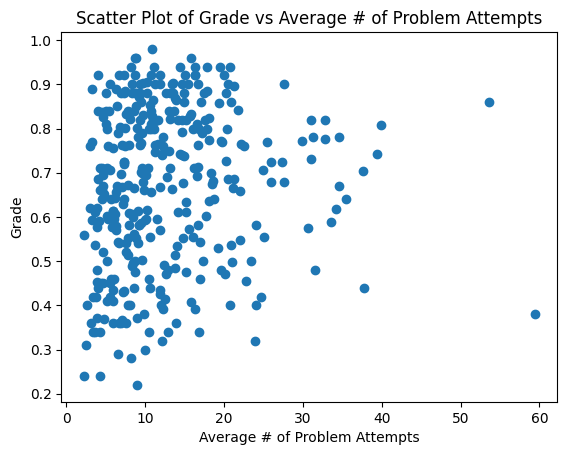

In [25]:
plt.scatter(result_df["average_problems"], result_df["X-Grade"])

plt.xlabel("Average # of Problem Attempts")
plt.ylabel("Grade")
plt.title("Scatter Plot of Grade vs Average # of Problem Attempts")

plt.show()